# Deep Learning (Spring 2021) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include your written report, this notebook (.ipynb file), and a PDF of this notebook.

## Problem 1a)

### Imports

In [21]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [ ]:
## Spectify Path to Provided Data Here
DATA_PATH = 'HW4_DL.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [ ]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """
    
    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """
    
    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

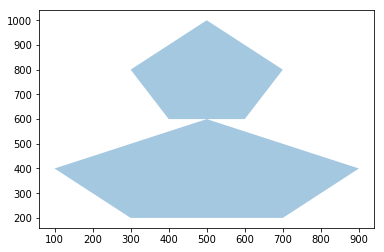

In [ ]:
visualize_polygons(p0,p1)

### Problem 1a) 

Please fill in all code blocks marked with a #TODO.

In [ ]:
def threshold_activation1(x):
    """
    
    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    """
    # TODO:
    y = []
    for i in range(len(x)):
        arr = np.array(x[i])
        if (arr==1).all():
            y.append(1)
        else:
            y.append(0)
    y = np.array(y)
    if (y==1).all():
        return 1
    else:
        return 0

def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    # TODO:
    y = []
    for i in range(len(x)):
        arr = np.array(x[i])
        if (arr==0).all():
            y.append(0)
        else:
            y.append(1)
    y = np.array(y)
    if (y==0).all():
        return 0
    else:
        return 1

def analytical_parameters(p0, p1):
    """
    
    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b 

def predict_output_v1(X, W, b):
    """
    
    """
    predictions = []
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        first_gate_output = and_gate(first_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output]
        prediction = and_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """
    
    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


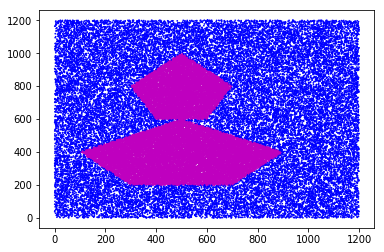

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the first_polygon [[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]] are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

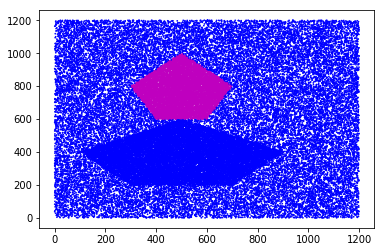

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

In [ ]:
## 1b

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size,num_classes):
        super(Net, self).__init__()

        ##feedfoward layers:
        #self.ff1 = nn.Linear(input_size, width) #input layer
        self.ff1 = nn.Linear(input_size, 10) #first layer
        self.ff2 = nn.Linear(10, 2) #second layers
        self.ff_out = nn.Linear(2, 1) #output layer     

        ##activations:
        self.sigmoid = nn.Sigmoid()

        #other activations:
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()


    def forward(self, input_data):
        out = self.sigmoid(self.ff1(input_data)) 
        out = self.sigmoid(self.ff2(out)) 
        out = self.sigmoid(self.ff_out(out))
        return out #returns class probabilities 

## Instantiating the model and Defining the optimizer

In [ ]:
net = Net(input_size = 2, num_classes = 1)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5, nesterov = False)
loss_metric = nn.BCELoss()

## Dataset Split and transformation (include normalize)

In [ ]:
X_train = X[:50000]
X_test = X[50000:60000]
Y_train = Y[:50000]
Y_test = Y[50000:60000]

In [ ]:
X_train_1 =np.mean(X_train[:,0])
X_train_2 =np.mean(X_train[:,1])
X_std_1 = np.std(X_train[:,0],ddof=1)
X_std_2 = np.std(X_train[:,1],ddof=1)
for idx in range(len(X_train)):
    X_train[idx,0] = (X_train[idx,0]-X_train_1)/X_std_1
    X_train[idx,1] = (X_train[idx,1]-X_train_2)/X_std_2
for idx in range(len(X_test)):
    X_test[idx,0] = (X_test[idx,0]-X_train_1)/X_std_1
    X_test[idx,1] = (X_test[idx,1]-X_train_2)/X_std_2  

In [ ]:
dtype = torch.float
X_train = torch.from_numpy(X_train).type(dtype)
X_test = torch.from_numpy(X_test).type(dtype)
Y_train = torch.from_numpy(Y_train).type(dtype)
Y_test = torch.from_numpy(Y_test).type(dtype)

In [ ]:
data_set_train = torch.utils.data.TensorDataset(X_train, Y_train)
train_loader = torch.utils.data.DataLoader(
    dataset=data_set_train,
    batch_size=100,
    shuffle=True
)
data_set_test = torch.utils.data.TensorDataset(X_test, Y_test)
test_loader = torch.utils.data.DataLoader(
    dataset=data_set_test,
    batch_size=100,
    shuffle=False
)

## Defining training and testing loss and accuracy functions

In [ ]:
def train_eval(verbose = 1):
    correct = 0
    total = 0
    loss_sum = 0
    for step, (batch_x, batch_y) in enumerate(train_loader):    
        outputs = net(batch_x)
        outputs[outputs <= 0.5] = 0
        outputs[outputs > 0.5] = 1
        total += batch_y.size(0)
        for pred,label in zip(outputs,batch_y):
            if pred== label:
                correct+=1
            batch_y = batch_y.reshape(-1,1)
            loss_sum += loss_metric(outputs,batch_y)
    """
    if verbose:
        print('Train accuracy: %f %%' % (100.0 * correct / total))
        print('Train loss: %f' % (loss_sum.cpu().data.numpy().item() / total))
    """
    return 100.0 * correct / total, loss_sum.cpu().data.numpy().item() / total
    
def test_eval(verbose = 1):
    correct = 0
    total = 0
    loss_sum = 0
    for step, (batch_x, batch_y) in enumerate(test_loader):    
        outputs = net(batch_x)
        outputs[outputs <= 0.5] = 0
        outputs[outputs > 0.5] = 1    
        total += batch_y.size(0)
        for pred,label in zip(outputs,batch_y):
            if pred== label:
                correct+=1
            batch_y = batch_y.reshape(-1,1)
            loss_sum += loss_metric(outputs,batch_y)
    """
    if verbose:
        print('Test accuracy: %f %%' % (100.0 * correct / total))
        print('Test loss: %f' % (loss_sum.cpu().data.numpy().item() / total))
    """
    return 100.0 * correct / total, loss_sum.cpu().data.numpy().item() / total

## Training and Make plots

Starting Training
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
The plots for the 5th model:


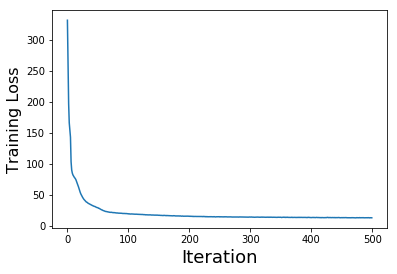

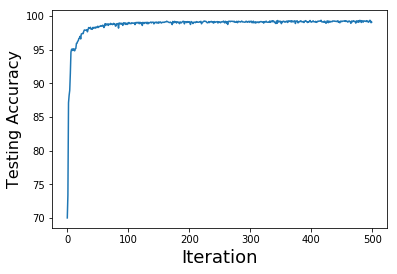

Train Accuracy of 5 random initialization:  mean: 99.31400000000001 std deviation: 0.1430244734302508
Test Accuracy of 5 random initialization:  mean: 99.334 std deviation: 0.14808781178746452


In [ ]:
#re-initializing network weights:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight.data)

#number of epochs to train for:
epochs = 500

def set_seed(seed):
    torch.manual_seed(seed)   

print("Starting Training")
acc_test = []
acc_train = []
#training loop:
for i in range(5):
    #set manual seeds for training
    set_seed(i)
    net = Net(input_size = 2, num_classes = 1)
    weights_init(net)
    optimizer = torch.optim.SGD(net.parameters(), lr = 0.5, nesterov = False)
    #defining train loss recording arrays for later visualization/plotting:
    loss_store = []
    acc_epoch = []
    for epoch in range(epochs):
        loss_tol = 0
        
        for step, (batch_x, batch_y) in enumerate(train_loader):

            #loss calculation and gradient update:
            optimizer.zero_grad()
            outputs = net.forward(batch_x)
            batch_y = batch_y.reshape(-1,1)
            loss = loss_metric(outputs,batch_y)
            loss_tol += loss.cpu().data.numpy().item()
            loss.backward()

            ##performing update:
            optimizer.step()
            
        loss_store.append(loss_tol)
        # choose the last model to compute test acc over each epoch
        if i == 4:
            test_perc_e, test_loss_e = test_eval()
            acc_epoch.append(test_perc_e)
        """
        if epoch % 10 ==0:
                print("Random seed order:",i, "iteration:",epoch, "loss:",loss.cpu().data.numpy().item(), "accuracy:",test_perc)
        """
                
    print("----End of 500th iteration for random initialization----")
    train_perc, train_loss = train_eval()
    acc_train.append(train_perc)
    test_perc, test_loss = test_eval()
    acc_test.append(test_perc)
    
    #Plot for the last model
    if i == 4 :
        print("The plots for the 5th model:")
    ## Plot Loss and Accuracy
        fig0=plt.figure(0)
        plt.plot(loss_store,'-')
        plt.xlabel('Iteration', fontsize=18)
        plt.ylabel('Training Loss', fontsize=16)
        plt.show()
        fig1=plt.figure(1)
        plt.plot(acc_epoch,'-')
        plt.xlabel('Iteration', fontsize=18)
        plt.ylabel('Testing Accuracy', fontsize=16)
        plt.show()   
print("Train Accuracy of 5 random initialization: ", "mean:", np.mean(acc_train),"std deviation:", np.std(acc_train,ddof=1))
print("Test Accuracy of 5 random initialization: ", "mean:", np.mean(acc_test),"std deviation:", np.std(acc_test,ddof=1)) 

## Make plot for prediction

In [ ]:
# reload data
data_p = np.load(DATA_PATH)
Y_p = data_p[:,2]
X_p = data_p[:,0:2]

In [ ]:
# re-normalize
X_train_p = X_p[:50000]
X_train_1_ =np.mean(X_train_p[:,0])
X_train_2_ =np.mean(X_train_p[:,1])
X_std_1_ = np.std(X_train_p[:,0],ddof=1)
X_std_2_ = np.std(X_train_p[:,1],ddof=1)
for idx in range(len(X_p)):
    X_p[idx,0] = (X_p[idx,0]-X_train_1_)/X_std_1_
    X_p[idx,1] = (X_p[idx,1]-X_train_2_)/X_std_2_
X_p_t = torch.from_numpy(X_p).type(dtype)

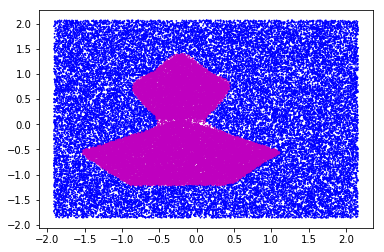

In [ ]:
prediction = net(X_p_t)
prediction[prediction <= 0.5] = 0
prediction[prediction > 0.5] = 1
pred = prediction.data.numpy()
# Visualize Predictions
visualize_datapoints(X_p, pred.flatten())

# Brief Discussion: 
I think we can find a solution that performs almost as good as the “manual" solution in (a). Because the decision boundaries are not complex (the dimension of sample points is also low) in this task and according to the training and testing results as well as this plot, the accuracy is very high so that we can believe from this fact that we can find such a good solution.

## 1c

Define new structure (increase depth and width)

In [ ]:
class Net_d(nn.Module):
    def __init__(self, input_size,num_classes):
        super(Net_d, self).__init__()

        ##feedfoward layers:
        #self.ff1 = nn.Linear(input_size, width) #input layer
        self.ff1 = nn.Linear(input_size, 20) #first layer
        self.ff2 = nn.Linear(20, 10) #second layer
        self.ff3 = nn.Linear(10, 5) #third layers
        self.ff_out = nn.Linear(5, 1) #output layer     

        ##activations:
        self.sigmoid = nn.Sigmoid()

        #other activations:
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()


    def forward(self, input_data):
        out = self.sigmoid(self.ff1(input_data)) 
        out = self.sigmoid(self.ff2(out)) 
        out = self.sigmoid(self.ff3(out))
        out = self.sigmoid(self.ff_out(out))
        return out #returns class probabilities 

Evaluate function similar as before

In [ ]:
def train_eval():
    correct = 0
    total = 0
    loss_sum = 0
    for step, (batch_x, batch_y) in enumerate(train_loader):    
        outputs = net_new(batch_x)
        outputs[outputs <= 0.5] = 0
        outputs[outputs > 0.5] = 1
        total += batch_y.size(0)
        for pred,label in zip(outputs,batch_y):
            if pred== label:
                correct+=1
            batch_y = batch_y.reshape(-1,1)
            loss_sum += loss_metric(outputs,batch_y)
    return 100.0 * correct / total, loss_sum.cpu().data.numpy().item() / total
    
def test_eval():
    correct = 0
    total = 0
    loss_sum = 0
    for step, (batch_x, batch_y) in enumerate(test_loader):    
        outputs = net_new(batch_x)
        outputs[outputs <= 0.5] = 0
        outputs[outputs > 0.5] = 1    
        total += batch_y.size(0)
        for pred,label in zip(outputs,batch_y):
            if pred== label:
                correct+=1
            batch_y = batch_y.reshape(-1,1)
            loss_sum += loss_metric(outputs,batch_y)
    return 100.0 * correct / total, loss_sum.cpu().data.numpy().item() / total

Training and make plots

Starting Training
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
----End of 500th iteration for random initialization----
The plots for the 5th model:


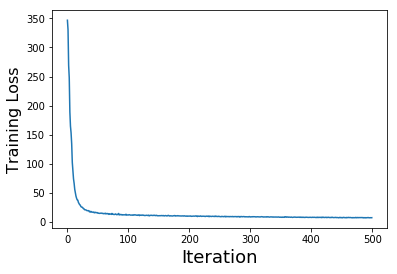

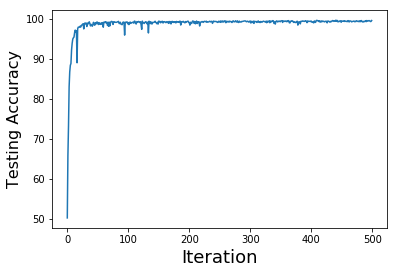

Train Accuracy of 5 random initialization:  mean: 99.4456 std deviation: 0.14497861911330298
Test Accuracy of 5 random initialization:  mean: 99.52799999999999 std deviation: 0.18390214789393122


In [ ]:
#re-initializing network weights:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight.data)

#number of epochs to train for:
epochs = 500

def set_seed(seed):
    torch.manual_seed(seed)   

print("Starting Training")
acc_test_ = []
acc_train_ = []
#training loop:
for i in range(5):
    #set manual seeds for training
    set_seed(i)
    net_new = Net_d(input_size = 2, num_classes = 1)
    weights_init(net_new)
    optimizer_ = torch.optim.SGD(net_new.parameters(), lr = 0.5, nesterov = False)
    #defining train loss recording arrays for later visualization/plotting:
    loss_store_ = []
    acc_epoch_ = []
    for epoch in range(epochs):
        loss_tol = 0
        
        for step, (batch_x, batch_y) in enumerate(train_loader):

            #loss calculation and gradient update:
            optimizer_.zero_grad()
            outputs_ = net_new.forward(batch_x)
            batch_y = batch_y.reshape(-1,1)
            loss = loss_metric(outputs_,batch_y)
            loss_tol += loss.cpu().data.numpy().item()
            loss.backward()

            ##performing update:
            optimizer_.step()
            
        loss_store_.append(loss_tol)
        # choose the last model to compute test acc over each epoch
        if i == 4:
            test_perc_n, test_loss_n = test_eval()
            acc_epoch_.append(test_perc_n)
                
    print("----End of 500th iteration for random initialization----")
    train_perc_n, train_loss_n = train_eval()
    acc_train_.append(train_perc_n)
    test_perc_n, test_loss_n = test_eval()
    acc_test_.append(test_perc_n)
    
    #Plot for the last model
    if i == 4 :
        print("The plots for the 5th model:")
    ## Plot Loss and Accuracy
        fig0=plt.figure(0)
        plt.plot(loss_store_,'-')
        plt.xlabel('Iteration', fontsize=18)
        plt.ylabel('Training Loss', fontsize=16)
        plt.show()
        fig1=plt.figure(1)
        plt.plot(acc_epoch_,'-')
        plt.xlabel('Iteration', fontsize=18)
        plt.ylabel('Testing Accuracy', fontsize=16)
        plt.show()   
print("Train Accuracy of 5 random initialization: ", "mean:", np.mean(acc_train_),"std deviation:", np.std(acc_train_,ddof=1))
print("Test Accuracy of 5 random initialization: ", "mean:", np.mean(acc_test_),"std deviation:", np.std(acc_test_,ddof=1)) 

# Make plot for prediction

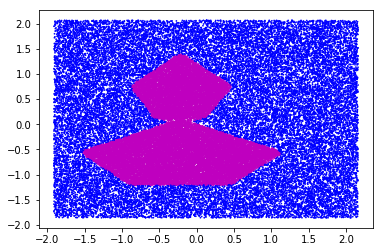

In [ ]:
prediction_new = net_new(X_p_t)
prediction_new[prediction_new <= 0.5] = 0
prediction_new[prediction_new > 0.5] = 1
pred_new = prediction_new.data.numpy()
# Visualize Predictions
visualize_datapoints(X_p, pred_new.flatten())

# 1d

Yes, I think my test results are valid and generalizable. Because both the accuracy of training and testing is high and the mean value is high with low std deviation. In this case, it shows that we do not overfit in this task and the performance of this model is quite good.

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [1]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler

### Data Loading

In [2]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


## Problem 2a)

### Design Model

In [3]:
class CNNet(nn.Module):
    
    """
    Since the input size is 28x28, the first conv layer I use 5x5 kernel with padding=2 to maintain the image size. Then I use Relu
    as activation function.(Relu can avoid gradient vanishing problem compared with sigmoid, and train faster) Then I use a maxpooling layer 
    to reduce the dimensioon. After than I use 2 conv layers with both 3x3 kernel(Relu activation), and then use a maxpooling to further 
    reduce the dimension. Finally, I use a FC layers to get outputs.

    """
    
    def __init__(self):
        """
        According to the description above, the current CNN structure is Conv1+Maxpooling+Conv2+Conv3+Maxpooling+FC
        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers
        ##feedfoward layers:
      
        self.conv1 = nn.Sequential(   
        nn.Conv2d(1, 16, kernel_size=5, padding=2),
        nn.ReLU()) 
        #maxpool1
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2) 
        #conv2
        self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=3),
        nn.ReLU())
        #conv3
        self.conv3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3),
        nn.ReLU()) 
        #maxpool2
        self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)  
        #FC layer
        self.fc = nn.Linear(5*5*64, 10)

    def forward(self, x):
        """
        define the forward process for this CNN
        """
        ##TODO: Setup Forward Pass
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.pool2(out)
        #reshape the dimension
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

### Evaluation Function

In [43]:
def test_cnn_eval(test_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(test_dataloader):
      images = images.float()
      outputs = cnn(images)
      #choose the item with max output as the prediction label
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)

def train_cnn_eval(train_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(train_dataloader):
      images = images.float()
      outputs = cnn(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)

def val_cnn_eval(val_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(val_dataloader):
      images = images.float()
      outputs = cnn(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)


### Model Training


In [55]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    Define the training process
    """
    ##TODO: Implement a training loop
    losses = []
    val_acc = []
    best_acc = 0
    for epoch in range(epochs):
        loss_cnn_t = 0
        for i, (images, labels) in enumerate(train_dataloader):
            images = images.float()
            optimizer.zero_grad()
            outputs = cnn(images)
            #calculate metric for loss
            loss_cnn = loss(outputs, labels)
            loss_cnn_t += loss_cnn.cpu().data.numpy().item()
            loss_cnn.backward()
            #performance update
            optimizer.step()
        losses.append(loss_cnn_t)
        val_cnn_acc = val_cnn_eval(val_dataloader)
        val_acc.append(val_cnn_acc)
        test_cnn_acc = test_cnn_eval(test_dataloader)
        #choose the best model with the highest test acc
        if test_cnn_acc > best_acc:
          best_acc = test_cnn_acc
          best_train_acc = train_cnn_eval(train_dataloader)
          best_val_acc = val_cnn_acc
    # plot for the training loss and validation accuracy change over epochs
    fig0=plt.figure(0)
    plt.plot(losses,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Training Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(val_acc,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Validation Accuracy', fontsize=16)
    plt.show()
    # the report for the best model
    print("The best model:")
    print("Training Accuracy:",best_train_acc.data.numpy(),"Validation Accuracy:",best_val_acc.data.numpy(),"Testing Accuracy:",best_acc.data.numpy())

    return outputs

In [56]:
## Hyperparameters
EPOCH = 50
LR = 0.1

## Setting up the model, optimizer, and loss function
## Initialize model
cnn = CNNet()
optimizer = torch.optim.SGD(cnn.parameters(), lr = 0.1, nesterov = False)
loss_f = nn.CrossEntropyLoss()

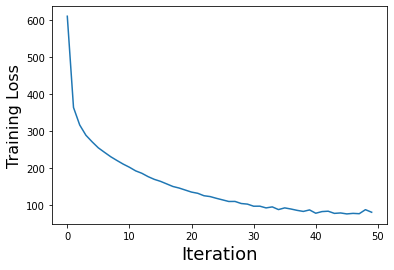

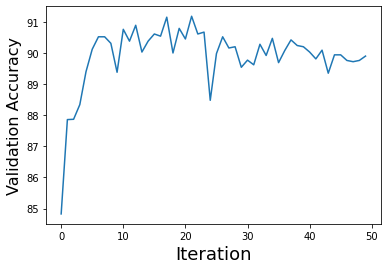

The best model:
Training Accuracy: 96.692 Validation Accuracy: 91.18 Testing Accuracy: 90.93


In [57]:
## Run Training Loop
out = train(cnn, optimizer, loss_f, LR)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [95]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 256
VAL_BATCH_SIZE = 256
TEST_BATCH_SIZE = 256

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In the new architecture, I add Batch Normalization to prevent the data from being too large and causing the instability of network performance before Relu activation. And I use Adam optimizer instead of vanilla SGD to help to get rid of the local minimizer problem.

In [96]:
##TODO: Try to improve upon your previous architecture
class CNNet_n(nn.Module):
    
    """
    The structure of new CNNet is shown in above description.

    """
    
    def __init__(self):
        
        ## Inherent Torch Module
        super(CNNet_n, self).__init__()
        ##TODO: Initialize Model Layers
        ##feedfoward layers:
        self.conv1 = nn.Sequential( 
        nn.Conv2d(1, 16, kernel_size=5, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU()) 
        #maxpool1
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2) 
        #conv2
        self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU())
        #conv3
        self.conv3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU()) 
        #maxpool2
        self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)  
        #FC layer
        self.fc = nn.Linear(5*5*64, 10)

    def forward(self, x):
        """
        define the forward process for this CNN
        """
        ##TODO: Setup Forward Pass
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.pool2(out)
        #reshape the dimension
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

### Evaluation Function

In [97]:
def test_cnn_eval_n(test_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(test_dataloader):
      images = images.float()
      outputs = cnn_new(images)
      #choose the item with max output as the prediction label
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)

def train_cnn_eval_n(train_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(train_dataloader):
      images = images.float()
      outputs = cnn_new(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)

def val_cnn_eval_n(val_dataloader):
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(val_dataloader):
      images = images.float()
      outputs = cnn_new(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  return (100 * correct / total)

### Model Training

In [98]:
##TODO: Fit and evaluate your model. What do you observe?
def train_new(model,
          optimizer,
          loss,
          lr,
          epochs=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    Define the training process
    """
    ##TODO: Implement a training loop
    losses = []
    val_acc = []
    best_acc = 0
    for epoch in range(epochs):
        loss_cnn_t = 0
        for i, (images, labels) in enumerate(train_dataloader):
            images = images.float()
            optimizer.zero_grad()
            outputs = model(images)
            #calculate metric for loss
            loss_cnn = loss(outputs, labels)
            loss_cnn_t += loss_cnn.cpu().data.numpy().item()
            loss_cnn.backward()
            #performance update
            optimizer.step()
        losses.append(loss_cnn_t)
        val_cnn_acc = val_cnn_eval_n(val_dataloader)
        val_acc.append(val_cnn_acc)
        test_cnn_acc = test_cnn_eval_n(test_dataloader)
        #choose the best model with the highest test acc
        if test_cnn_acc > best_acc:
          best_acc = test_cnn_acc
          best_train_acc = train_cnn_eval_n(train_dataloader)
          best_val_acc = val_cnn_acc
    # plot for the training loss and validation accuracy change over epochs
    fig0=plt.figure(0)
    plt.plot(losses,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Training Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(val_acc,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Validation Accuracy', fontsize=16)
    plt.show()
    # the report for the best model
    print("The best model:")
    print("Training Accuracy:",best_train_acc.data.numpy(),"Validation Accuracy:",best_val_acc.data.numpy(),"Testing Accuracy:",best_acc.data.numpy())

    return outputs

In [99]:
## Hyperparameters
EPOCH = 50
LR = 0.01

## Setting up the model, optimizer, and loss function
## Initialize model
cnn_new = CNNet_n()
# Use Adam optimizer
optimizer_new = torch.optim.Adam(cnn_new.parameters(), lr=LR)
loss_f = nn.CrossEntropyLoss()

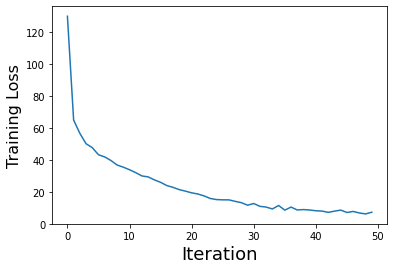

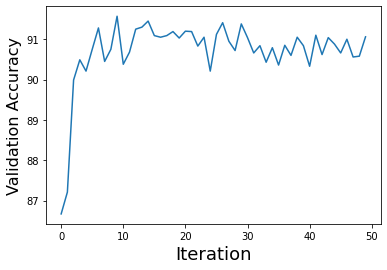

The best model:
Training Accuracy: 96.09 Validation Accuracy: 91.45 Testing Accuracy: 91.46


In [100]:
## Run Training Loop
out_new = train_new(cnn_new, optimizer_new, loss_f, LR)

According to the results of new CNN, the validation accuracy and testing accuracy is improved compared with the previous CNN.

## Problem 2c)

Write down your response in the final report.